# Week 3 Exercises
For Week 3 we want you to start exploring machine learning topics using the TensorFlow+Keras package. In particularly we want you to perform some investigations using the MNIST dataset.


### The tasks this week are:

1. Write a function that adds random noise to MNIST images. For each pixel in the MNIST image the function should add a random noise contribution drawn from a uniform distribution from 0 to $y_{noise}$, where $y_{noise}$ is a configurable parameter.

2. Train a neural network on the MNIST dataset such that it gets acceptable performance (e.g a test accuracy of 95% or higher)

3. Without retraining your network use this network to make a plot of test accuracy vs $y_{noise}$ (so run the network repeatedly on the test dataset each time adding a differing noise contribution)

4. Now retrain your neural network using the training sample but with some level of noise added to the sample and then redo task 3.  

5. What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?


Importing required modules and the MNIST database. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl  
mpl.rcParams['figure.dpi']=200 # dots per inch

print(tf.__version__) #for debugging purposes

2.6.0


MNIST database

In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Outputting shapes and lengths for reference.

In [3]:
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


Normalizing the pixel values so they are between 0 and 1.

In [4]:
train_images=train_images/255.0
test_images=test_images/255.0

1. Write a function that adds random noise to MNIST images. For each pixel in the MNIST image the function should add a random noise contribution drawn from a uniform distribution from 0 to $y_{noise}$, where $y_{noise}$ is a configurable parameter.

In this section, I define a function to add noise to every pixel of the MNIST images. The function will have an input `y_noise` that is a configurable parameter.

In [5]:
def add_noise(image, y_noise):
  """
  function that adds random noise to MNIST images. For each pixel in the MNIST image, 
  the function will add random noise contribution drawn from a uniform distribution 
  from 0 to y_noise, where y_noise is a configurable parameter
  
  inputs: image (the MNIST image); y_noise (noise parameter)
  outputs: image_noisy (image with noise)"""

  image_noisy = image + y_noise*np.random.normal(size=image.shape)
  return image_noisy

Copied a function from the script that displays `whichImg` amount of pictures in a grid. Useful for visualizing the images after adding noise with the `add_noise()` function.

In [6]:
#COPIED FROM SCRIPT 
def display_image_array(whichImg):    
    numcols=int(math.sqrt(len(whichImg)))
    if numcols*numcols < len(whichImg):
        numcols=numcols+1
    BigImage=np.zeros([28*numcols,28*numcols])
    for j in range(len(whichImg)):
        x=(j%numcols)*28
        y=int(j/numcols)*28
        BigImage[x:x+28,y:y+28]=example_image_noisy[whichImg[j]]
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.axis('off')
    plt.show()

Printing images with noise level = 0.0, 0.25, 0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00 for reference and comparison.

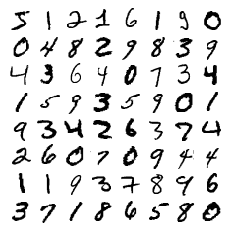

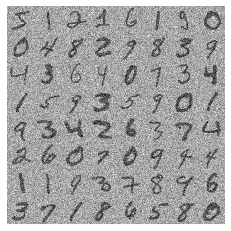

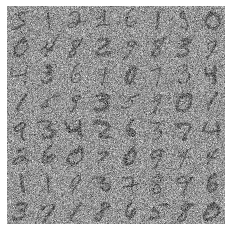

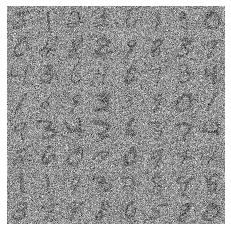

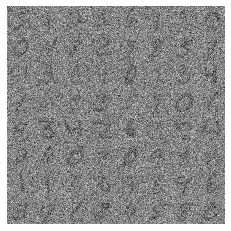

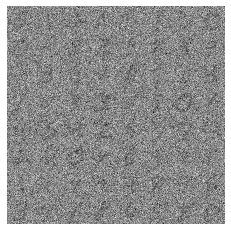

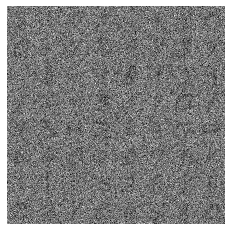

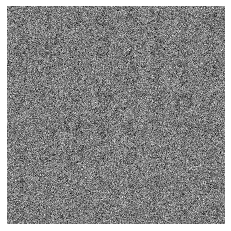

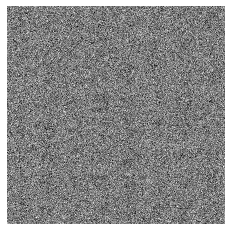

In [7]:
example_noise = np.linspace(0,2,9)
for i in example_noise:
  example_image_noisy = add_noise(train_images, i)
  whichImg = range(64)
  display_image_array(whichImg)

2. Train a neural network on the MNIST dataset such that it gets acceptable performance (e.g a test accuracy of 95% or higher)

In the cell below, a neural network is created using keras. The code is copied from the weekly notebook provided by the course on Moodle. This model has three layers: 
1. The first layer flattens the 28x28 pixel image into a 1D array of length 784 (28x28). 
2. The second layer is fully connected and the number of nodes can be configured to a suitable number to optimize network complexity and accuracy. A number of nodes between 30-50 was tested to reasonably achieve 95% accuracy over 10 epochs using the Adam optimizer.
3. The third layer has 10 nodes as there are 10 required outputs corresponding to the digits 0-9.

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(10)
])

To train our model we need:
1. The loss function: How well our model is doing
2. The Optimizer: How the model gets updated based on data and the loss function, the optimizer 'Adam' is used as based on testing, it provides the best accuracy over 10 epochs. *Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments*. The list of other optimizers can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
3. Metrics: The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

Training the model using `train_images` and `train_labels` from the MNIST database. A 97.65% accuracy was achieved using the [1,40,10] network over 10 epochs. It can be seen that accuracy increases and loss decreases as the model is trained.

In [10]:
history=model.fit(train_images, train_labels,batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4470 - accuracy: 0.8770
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2241 - accuracy: 0.9365
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1772 - accuracy: 0.9503
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1483 - accuracy: 0.9574
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1288 - accuracy: 0.9634
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1141 - accuracy: 0.9672
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1024 - accuracy: 0.9699
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0936 - accuracy: 0.9728
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0852 - accuracy: 0.9754
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0791 - accuracy: 0.9769

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #testing the accuracy

313/313 - 0s - loss: 0.1093 - accuracy: 0.9665


3. Without retraining your network use this network to make a plot of test accuracy vs $y_{noise}$ (so run the network repeatedly on the test dataset each time adding a differing noise contribution)

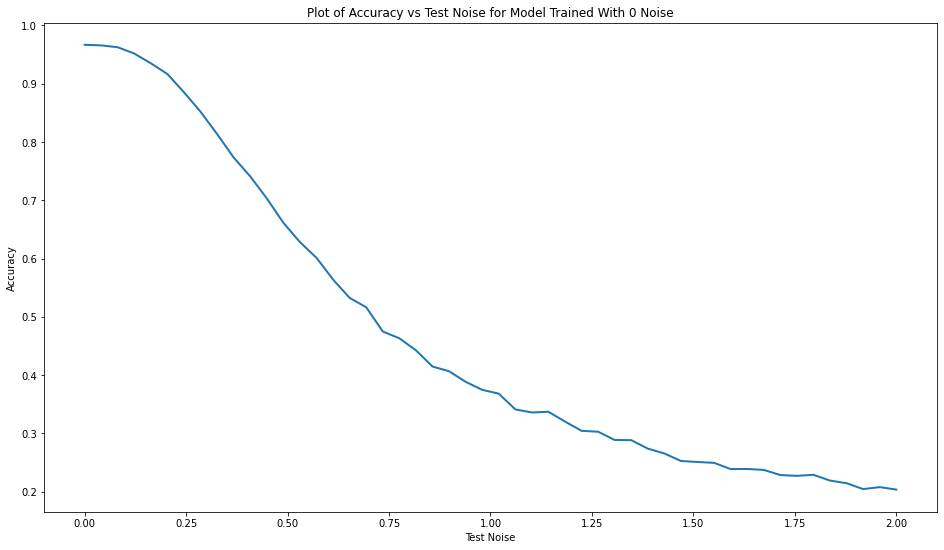

In [12]:
noise = np.linspace(0,2,50) #array for test noise.
accuracy = [] #initialise array for plotting

for i in noise: #loop over testing noise
  noisy_test = add_noise(test_images, i)
  test_loss, test_acc = model.evaluate(noisy_test, test_labels, verbose=0) 
  accuracy.append(test_acc)

fig,ax=plt.subplots(figsize=(16,9))
ax.set_xlabel("Test Noise")
ax.set_ylabel("Accuracy")
ax.set_title('Plot of Accuracy vs Test Noise for Model Trained With 0 Noise')
ax.plot(noise, accuracy, linewidth=2)

4. Now retrain your neural network using the training sample but with some level of noise added to the sample and then redo task 3.  

This code takes around 10 minutes to execute as it loops over 50 testing noises for 9 training noises. To decrease execution time, the 9 in `train_noise = np.linspace(0,2,9)` can be decreased to a lower desired number, and the 50 in `test_noise = np.linspace(0,2,50)` can also be decreased to a lower number. I would recommend 5 and 25 respectively to still demonstrate a good general idea of the relationship between the different models.

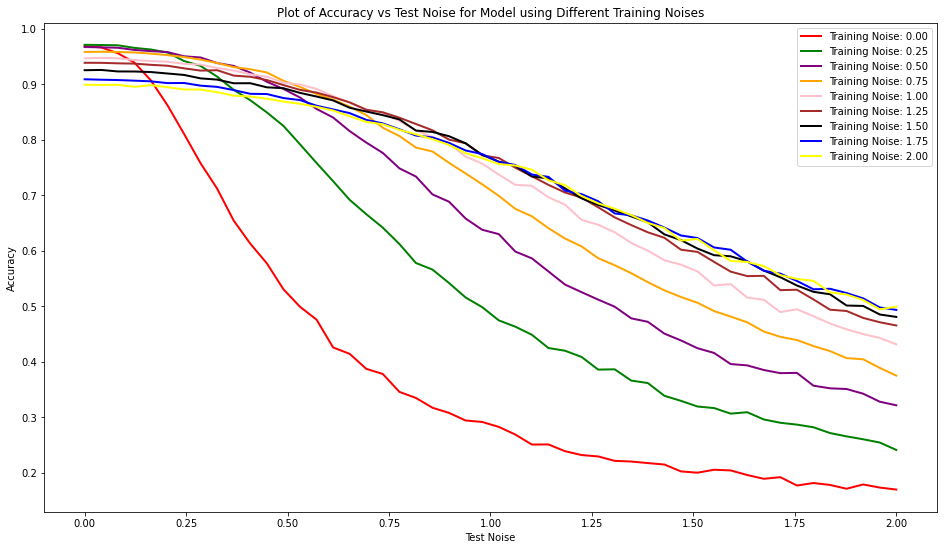

In [13]:
def training(noise):
  """
  function to train model using desired noise
  """
  noisy_train = add_noise(train_images, noise)
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='Adam',metrics=['accuracy'])
  history=model.fit(noisy_train, train_labels,batch_size=100, epochs=10, verbose=0)
  return history

train_noise = np.linspace(0,2,9) #training noises [0,0.25,0.5,...,2.0]
fig,ax=plt.subplots(figsize=(16,9)) 
color = ['red', 'green', 'purple', 'orange', 'pink','brown','black', 'blue', 'yellow'] #colors for plot

for i, noise in enumerate(train_noise): #loop to train model over diff noises
  history = training(noise) 
  test_noise = np.linspace(0,2,50) #testing noises
  accuracy = []
  for j in test_noise: 
    noisy_test = add_noise(test_images, j)
    test_loss, test_acc = model.evaluate(noisy_test, test_labels, verbose=0)
    accuracy.append(test_acc)

  #plotting 
  ax.plot(test_noise, accuracy, linewidth=2, color= color[i], label="Training Noise: {:.2f}".format(noise))
  ax.set_xlabel("Test Noise")
  ax.set_ylabel("Accuracy")
  ax.legend(loc='best')
  ax.set_title('Plot of Accuracy vs Test Noise for Model using Different Training Noises')

5. What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?

By looking at the different curves, the difference between training the model with 0 noise and with noise is significant. As expected, at lower noise intervals, the models with lower training noise have high accuracy. This is because the model trained on clean images, and therfore has high accuracy on clean images. However, as the testing noise increases, the models trained on low noises drop significantly in accuracy. The models trained with higher accuracy still decrease in accuracy at higher tesing noises, however, the rate of decrease is less. 

Looking at the plot above, it can be seen that the model trained with no noise has the worst accuracy across most testing noises, except at extremely low noise, for example, [0, 0.1]. By adding even 0.25 noise to train the model, the increase in accuracy over most testing noises increases significantly. Taking some example testing noises, such as at 0.5, 1.0, 1.5, 2.0, it can be seen that there is a ~25% increase in accuracy at 0.5 testing noise, ~15% increase at 1.0 testing noise, ~8% increase at 1.5 testing noise, and ~5% at 2.0 testing noise. By increasing the training noise, there is even more increase in the accuracy at these testing noise intervals. 

I would define performance as the accuracy of the model in regards to the data set in question. For example, if the data set had clear images with relatively low noise (0 to 0.1), the models with 0 and 0.25 training noise would have the best "performance". However, in most real life scenarios and data sets, images will most likely have more noise than the interval in which these models perform well. 

From the previous plot of the image with the comparison of different noise levels, I would say the images with $y_{noise}$ = [0.0, 1.0] can be easily distinguished, $y_{noise}$ = [1.00, 1.25] is hard to distinguish, and $y_{noise}$ = [1.25, 2.00] is undistinguishable. A reasonable estimate of real-life image data sets would range from noise = [0.10, 1.00], as I assume that would be the most common noise levels for images. Returning to the original question, **to maximise the performance in a majority of scenarios**, a training noise of **1.00** is the best level of noise to add to a training dataset. This is because it has high accuracy at noise levels = [0.00, 0.75], and relatively high accuracy at noise levels = [0.75, 1.00]. Although it has lower accuracy compared to the models trained with higher noise levels (>1.25) at noise = [0.75, 1.00], the difference is less compared to the increase in accuracy at noise = [0.00, 0.75]. Therefore, I would say **this model has the best performance**; however, the best performing model can vary based on the dataset and application. 